<a href="https://colab.research.google.com/github/maruthikelgire/My-Practices/blob/main/supply_chain_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
import numpy as np # linear algebra
import pandas as pd # Import the pandas library and alias it as 'pd'

df = pd.read_csv("/content/FMCG_data.csv.zip")

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.subplots as sp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,...,1,142,34.0,2005.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,...,1,130,28.0,2012.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,...,1,147,NaN,NaN,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,...,1,60,25.0,NaN,18,0,A,6,30,25093


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [ ]:
wh = df.dropna(subset=['wh_est_year'])
pd.options.mode.copy_on_write = True

df['wh_est_year'] = wh['wh_est_year'].astype(int)
df.wh_est_year.unique()

array([  nan, 2009., 2010., 2013., 1999., 2017., 2022., 2008., 2001.,
       2016., 1997., 2003., 2006., 2019., 2015., 2012., 1998., 2021.,
       2004., 2000., 2005., 2011., 2014., 1996., 2020., 2023., 2002.,
       2007., 2018.])

In [ ]:
df.shape
df.isna().sum()

,0
Ware_house_ID,0
WH_Manager_ID,0
Location_type,0
WH_capacity_size,0
zone,0
WH_regional_zone,0
num_refill_req_l3m,0
transport_issue_l1y,0
Competitor_in_mkt,0
retail_shop_num,0


In [ ]:
df.describe()
df.select_dtypes(include='object').describe()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
count,25000,25000,25000,25000,25000,25000,25000,24092
unique,25000,25000,2,3,4,6,2,5
top,WH_100000,EID_50000,Rural,Large,North,Zone 6,Company Owned,C
freq,1,1,22957,10169,10278,8339,13578,5501


In [ ]:
df.WH_capacity_size.mode()

,WH_capacity_size
0,Large


In [ ]:
df.WH_capacity_size.value_counts().reset_index()

,WH_capacity_size,count
0,Large,10169
1,Mid,10020
2,Small,4811


In [ ]:
df.Location_type.value_counts().reset_index()

,Location_type,count
0,Rural,22957
1,Urban,2043


In [ ]:
df.groupby('zone')['retail_shop_num'].sum().reset_index()

,zone,retail_shop_num
0,East,2061277
1,North,51869267
2,South,31932776
3,West,38779469


In [ ]:
df.groupby('WH_regional_zone')['workers_num'].mean().reset_index()

,WH_regional_zone,workers_num
0,Zone 1,29.079574
1,Zone 2,28.743536
2,Zone 3,29.003240
3,Zone 4,28.688950
4,Zone 5,28.988831
5,Zone 6,29.066117


In [ ]:
df.groupby('zone')['workers_num'].mean()

,workers_num
zone,
East,29.247573
North,28.924790
South,28.892003
West,28.995405


In [ ]:
df.groupby('WH_capacity_size')['workers_num'].mean()

,workers_num
WH_capacity_size,
Large,29.023595
Mid,28.795626
Small,29.088229


In [ ]:
df['workers_num'] = wh['workers_num'].fillna(wh.groupby('WH_regional_zone')['workers_num'].transform('mean'))


In [ ]:
df.workers_num.isna().sum()

11881

In [ ]:
df.electric_supply.value_counts()


,count
electric_supply,
1,16422
0,8578


In [ ]:
total_warehouses = len(wh)

warehouses_with_electric_supply = df['electric_supply'].sum()

percentage_with_electric_supply = (warehouses_with_electric_supply / total_warehouses) * 100

print(f"Percentage of warehouses with electric supply: {percentage_with_electric_supply:.2f}%")

Percentage of warehouses with electric supply: 125.18%


In [ ]:
df.groupby('zone')['dist_from_hub'].mean().reset_index()


,zone,dist_from_hub
0,East,162.634033
1,North,162.900953
2,South,164.128733
3,West,163.936452


In [ ]:
df.groupby(['zone', 'WH_regional_zone'])['dist_from_hub'].mean()


zone   WH_regional_zone
East   Zone 1              171.465116
       Zone 3              169.866071
       Zone 4              156.014085
       Zone 5              154.054054
       Zone 6              169.275862
North  Zone 1              162.161712
       Zone 2              165.117096
       Zone 3              161.744017
       Zone 4              162.303541
       Zone 5              163.375065
       Zone 6              162.821421
South  Zone 1              162.261765
       Zone 2              163.078255
       Zone 3              163.328814
       Zone 4              166.216553
       Zone 5              164.592593
       Zone 6              164.964076
West   Zone 1              162.044898
       Zone 2              159.512782
       Zone 3              163.202600
       Zone 4              166.113428
       Zone 5              164.850907
       Zone 6              163.479566
Name: dist_from_hub, dtype: float64

In [ ]:
# Total number of warehouses
total_warehouses = len(wh)

# Total number of warehouses with storage issues in the last 3 months
total_issues = wh['storage_issue_reported_l3m'].sum()

# Count of warehouses with storage issues by zone and regional zone
issues_by_zone = wh[wh['storage_issue_reported_l3m'] > 0].groupby('zone').size().reset_index(name='issues_count')
issues_by_regional_zone = wh[wh['storage_issue_reported_l3m'] > 0].groupby('WH_regional_zone').size().reset_index(name='issues_count')

print(f"Total warehouses: {total_warehouses}")
print(f"Total warehouses with storage issues: {total_issues}")

print("Issues by Zone:")
print(issues_by_zone)

print("\nIssues by Regional Zone:")
print(issues_by_regional_zone)

Total warehouses: 13119
Total warehouses with storage issues: 240515
Issues by Zone:
    zone  issues_count
0   East           220
1  North          5202
2  South          3120
3   West          4104

Issues by Regional Zone:
  WH_regional_zone  issues_count
0           Zone 1           980
1           Zone 2          1500
2           Zone 3          1461
3           Zone 4          2169
4           Zone 5          2318
5           Zone 6          4218


In [ ]:
df.groupby('WH_regional_zone')['num_refill_req_l3m'].sum().sort_values(ascending=False).head(3)

,num_refill_req_l3m
WH_regional_zone,
Zone 6,34156
Zone 5,18731
Zone 4,17234


In [ ]:
df.groupby(['zone','WH_regional_zone'])['govt_check_l3m'].mean()

zone   WH_regional_zone
East   Zone 1              26.813953
       Zone 3              27.000000
       Zone 4              26.000000
       Zone 5              14.000000
       Zone 6              15.000000
North  Zone 1              19.252081
       Zone 2              11.741218
       Zone 3              25.326743
       Zone 4              26.000000
       Zone 5              18.257694
       Zone 6              19.569374
South  Zone 1              21.066176
       Zone 2              24.909280
       Zone 3              21.449718
       Zone 4              23.088435
       Zone 5              17.187895
       Zone 6              14.865103
West   Zone 1              20.065306
       Zone 2              10.078195
       Zone 3              20.161430
       Zone 4              18.126144
       Zone 5              13.971793
       Zone 6              14.669725
Name: govt_check_l3m, dtype: float64

In [ ]:
df.approved_wh_govt_certificate.value_counts()

,count
approved_wh_govt_certificate,
C,5501
B+,4917
B,4812
A,4671
A+,4191


In [ ]:
correlation = wh['workers_num'].corr(wh['storage_issue_reported_l3m'])
print(f"The correlation between the number of workers and the number of reported storage issues is: {correlation}")

The correlation between the number of workers and the number of reported storage issues is: -0.0009607599199738706


In [ ]:
df.pivot_table(index='WH_capacity_size', columns='num_refill_req_l3m', values='Ware_house_ID', aggfunc='count')

num_refill_req_l3m,0,1,2,3,4,5,6,7,8
WH_capacity_size,,,,,,,,,
Large,1137,1185,764,1215,1144,1216,1142,1164,1202
Mid,1201,1098,671,1224,1157,1154,1122,1169,1224
Small,574,573,373,551,545,571,540,540,544


In [ ]:
df.groupby('zone')['transport_issue_l1y'].mean().round(decimals=2)


,transport_issue_l1y
zone,
East,0.79
North,0.78
South,0.77
West,0.76


In [ ]:
filtered_wh = wh[wh['temp_reg_mach']==1]
avg_weight = filtered_wh['product_wg_ton'].mean().round(decimals=2)
print('\nAverage product weight per ton for warehouses with temperature regulation machinery:', avg_weight)


Average product weight per ton for warehouses with temperature regulation machinery: 25428.15


In [ ]:
df.groupby('govt_check_l3m')['storage_issue_reported_l3m'].sum().sort_values(ascending=False).head().reset_index()

,govt_check_l3m,storage_issue_reported_l3m
0,26,50231
1,23,31942
2,19,27637
3,14,24666
4,28,24615


In [ ]:
df.groupby('Location_type')['workers_num'].mean().round(decimals=2)

,workers_num
Location_type,
Rural,28.86
Urban,28.73


In [ ]:
cor = wh['transport_issue_l1y'].corr(wh['dist_from_hub'])
print(cor)

fig = px.scatter(wh, x='transport_issue_l1y', y='dist_from_hub', size='dist_from_hub')
fig.show()

-0.004667275849114954


In [ ]:
df.pivot_table(index='Competitor_in_mkt', columns='num_refill_req_l3m', values='Ware_house_ID', aggfunc='count')

num_refill_req_l3m,0,1,2,3,4,5,6,7,8
Competitor_in_mkt,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,49.0,56.0,29.0,54.0,52.0,42.0,57.0,47.0,46.0
2,965.0,1010.0,657.0,1057.0,1007.0,978.0,964.0,1013.0,1018.0
3,864.0,786.0,479.0,843.0,787.0,871.0,780.0,821.0,863.0
4,774.0,759.0,508.0,783.0,771.0,818.0,768.0,758.0,769.0
5,157.0,160.0,82.0,158.0,130.0,144.0,132.0,134.0,168.0
6,66.0,61.0,33.0,61.0,62.0,62.0,74.0,64.0,63.0
7,26.0,15.0,13.0,22.0,27.0,19.0,20.0,21.0,26.0
8,9.0,7.0,6.0,10.0,9.0,6.0,9.0,8.0,12.0


In [ ]:
df.groupby('Competitor_in_mkt')['num_refill_req_l3m'].sum()

,num_refill_req_l3m
Competitor_in_mkt,
0,7
1,1733
2,35432
3,29107
4,27364
5,5112
6,2264
7,785
8,321


In [ ]:
df.pivot_table(index='storage_issue_reported_l3m', columns='approved_wh_govt_certificate', values='Ware_house_ID', aggfunc='count')


approved_wh_govt_certificate,A,A+,B,B+,C
storage_issue_reported_l3m,,,,,
4,144,41,187,237,472
5,229,101,305,258,458
6,202,126,199,195,334
7,68,31,91,114,187
8,34,21,89,102,160
9,151,150,181,140,165
10,130,142,138,90,137
11,190,186,173,126,192
12,160,152,152,122,153


In [ ]:
df.groupby('approved_wh_govt_certificate')['storage_issue_reported_l3m'].sum()

,storage_issue_reported_l3m
approved_wh_govt_certificate,
A,85226
A+,83335
B,84684
B+,87418
C,87598


<Figure size 1120x640 with 0 Axes>

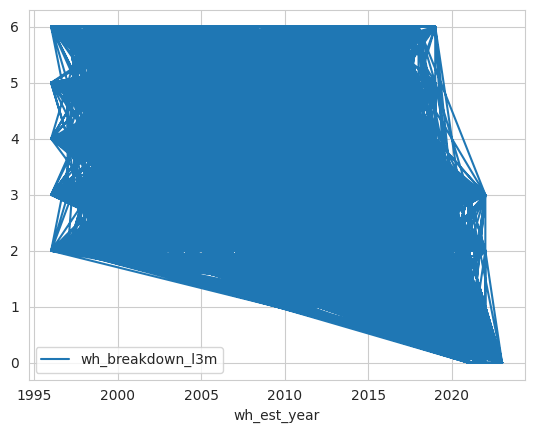

In [ ]:
plt.figure(figsize=(14,8), dpi=80, frameon=True)
df.plot(kind='line', x='wh_est_year', y='wh_breakdown_l3m')
plt.show()

In [ ]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [ ]:
wh.isna().sum()

,0
Ware_house_ID,0
WH_Manager_ID,0
Location_type,0
WH_capacity_size,0
zone,0
WH_regional_zone,0
num_refill_req_l3m,0
transport_issue_l1y,0
Competitor_in_mkt,0
retail_shop_num,0


In [ ]:
wh.to_csv('Amazon_FMCG.csv')

1. Setting Up Agents with LangChain and OpenAGI

In [ ]:
from langchain.agents import initialize_agent, Tool

In [ ]:
from exa_py import Exa

exa = Exa(api_key="a04814e6-d805-4006-9235-49065cbd3286")

result = exa.search(
  "blog post about Rust",
  type="auto"
)

In [ ]:
pip install tavily-python

In [ ]:
from tavily import TavilyClient

# Step 1. Instantiating your TavilyClient
tavily_client = TavilyClient(api_key="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")

# Step 2. Executing a simple search query
response = tavily_client.search("Who is Leo Messi?")

# Step 3. That's it! You've done a Tavily Search!
print(response)

{'query': 'Who is Leo Messi?', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://www.espn.com/soccer/story/_/id/40624256/lionel-messi-soccer-career-stats-accolades-honors', 'title': "Lionel Messi's soccer career: Stats, trophies, honors - ESPN", 'content': "Lionel Messi is the most decorated player in the history of the world's most popular sport. The Argentine superstar has transcended soccer,", 'score': 0.78532547, 'raw_content': None}, {'url': 'https://olympics.com/en/athletes/lionel-messi', 'title': 'Lionel Messi | Biography, Competitions, Wins and Medals', 'content': '“The Olympic gold in 2008 is the win that I value the most because it is a tournament that you may play only once in your life and involves many athletes from different disciplines” - Lionel Messi, Spanish Esquire\nFeatured\nLatest News\nOlympic Results\nAthlete Olympic Results Content\nYou may like Lionel MESSI\nBiography\nBorn in Rosario, Argentina in 1987 Lionel Messi is widel

In [ ]:
# Function to perform Tavily search and print results
def search_tavily(query):
  response = tavily_client.search(query)
  print(response)

# Example usage before your other code:
search_tavily("FMCG industry trends in India")

{'query': 'FMCG industry trends in India', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://www.businessoffood.in/8-trends-shaping-indias-fmcg-industry/', 'title': "8 Trends Shaping India's FMCG Industry - Business of Food", 'content': 'The FMCG industry in India has been battling inflation to protect growth and margins in last few years, new trends are emerging on the horizon with the potential to shape the consumer products industry for years to come. The rise of D2C brands: \xa0The traditional model of the FMCG industry in India required developing new brands, categories and products based on in-depth consumer research and taking them to market through a fragmented and unorganised distribution network. However, growth in digital technologies millennial consumers’ changed behaviour and a start-up culture have led to a new type of FMCG company- Direct to Consumer or D2C. Significantly, direct ordering and e-commerce platforms have fueled substant

In [ ]:
from langchain.agents import initialize_agent, Tool
from langchain.tools import BaseTool
# You likely need to install these if you haven't already
!pip install tavily-python exa-py -q

from tavily import TavilyClient
from exa_py import Exa

# Custom Tavily Tool
class TavilySearchTool(BaseTool):
    name: str = "Tavily Search"  # Added type annotation for 'name'
    description: str = "A tool for searching the web using Tavily API"  # Added type annotation for 'description'

    def __init__(self, api_key):
        self.tavily_client = TavilyClient(api_key=api_key)

    def _run(self, query: str):
        response = self.tavily_client.search(query)
        return response  # You might need to format this further

    async def _arun(self, query: str):
        raise

2. Demand Forecasting Model Using Prophet

In [ ]:
from prophet import Prophet
import pandas as pd

# Load data
data = pd.read_csv("/content/Amazon_FMCG.csv")

# Data preprocessing (e.g., handling intermittent demand, outliers, seasonality)

# Rename columns (correcting the syntax error)
data.rename(columns={"govt_check_l3m": "govt_check_l3m", "storage_issue_reported_l3m": "storage_issue_reported_l3m"}, inplace=True)

# Check if 'Date' or a similar column exists, and adjust accordingly
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
elif 'wh_est_year' in data.columns:  # Assuming 'wh_est_year' represents the date
    data['Date'] = pd.to_datetime(data['wh_est_year'], format='%Y') # Assuming year only
    # If you have month/day, adjust format accordingly (e.g., '%Y-%m-%d')
else:
    raise KeyError("No suitable date column found. Please specify the correct column name.")

data = data[['Date', 'govt_check_l3m']]  # Replace 'TargetColumn' with your actual sales column
data.columns = ['ds', 'y']

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8_1rn55/gj2gge4c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8_1rn55/n0hkjgge.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1646', 'data', 'file=/tmp/tmp_8_1rn55/gj2gge4c.json', 'init=/tmp/tmp_8_1rn55/n0hkjgge.json', 'output', 'file=/tmp/tmp_8_1rn55/prophet_modelpawldhub/prophet_model-20250101122732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:27:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:27:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


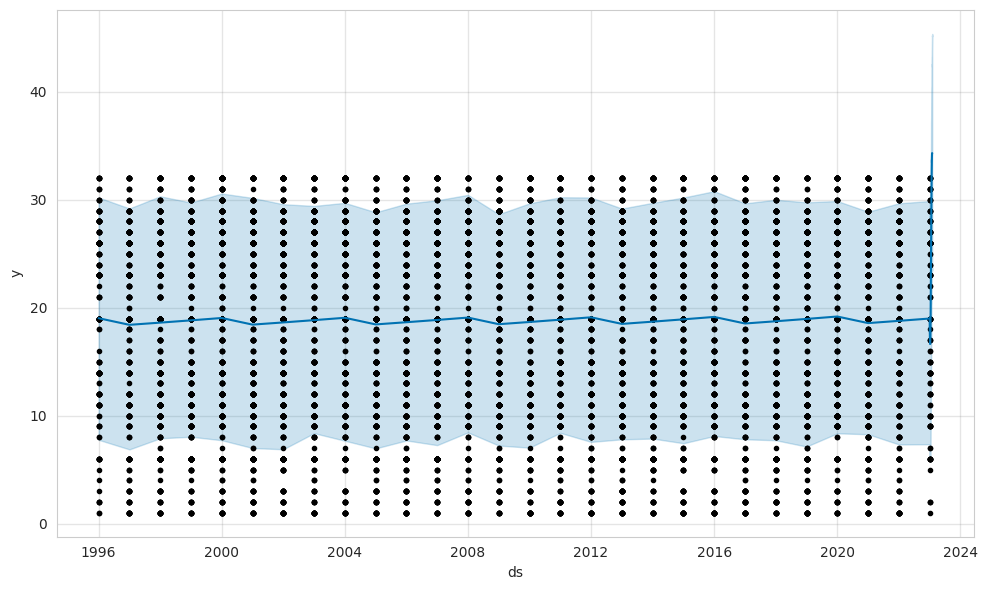

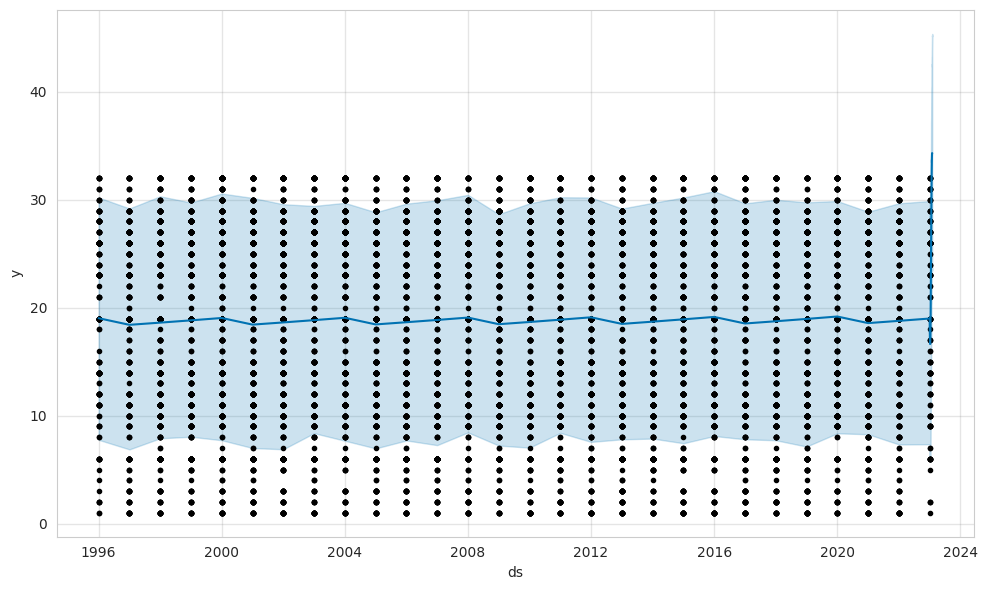

In [ ]:
# Train forecasting model
model = Prophet()
model.fit(data)

# Generate future predictions
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot predictions
model.plot(forecast)

Deployment with Streamlit